#  Principal component analysis (PCA)

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mnist-dataset/train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
d0 = pd.read_csv("/kaggle/input/mnist-dataset/train.csv")
print(d0.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
l = d0['label']
d= d0.drop('label',axis=1)
print(d)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [4]:
labels = l.head(1500)
data = d.head(1500)
print('the shape of sampledata=',data.shape)

the shape of sampledata= (1500, 784)


In [5]:
from sklearn import decomposition
pca = decomposition.PCA()

In [6]:
pca.n_components = 2
pca_data = pca.fit_transform(data)
print('shape  of  pca-reduced.shape ',pca_data.shape)

shape  of  pca-reduced.shape  (1500, 2)


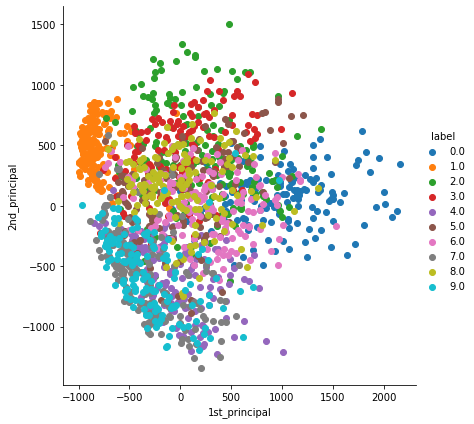

In [7]:
import seaborn as sn
pca_data = np.vstack((pca_data.T,labels)).T
pca_df = pd.DataFrame(data= pca_data,columns=('1st_principal','2nd_principal','label'))
sn.FacetGrid(pca_df, hue= "label",height =6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

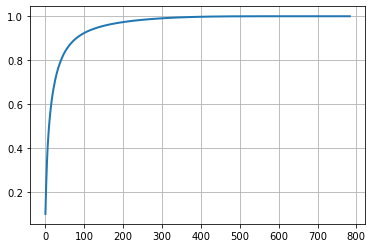

In [8]:
pca.n_components = 784

pca_data = pca.fit_transform(data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explaind = np.cumsum(percentage_var_explained)

#plot the pca specturm
plt.figure(1, figsize=(6,4))
plt.clf()
plt.plot(cum_var_explaind,linewidth = 2)
plt.axis('tight')
plt.grid()
plt.show()

This code is Principal component analysis (PCA) dimensionality reduction technique.

# t-distributed stochastic neighbor embedding (t-SNE)

In [17]:
label_1500 = l.head(1500)
print(label_1500)

0       1
1       0
2       1
3       4
4       0
       ..
1495    0
1496    1
1497    2
1498    8
1499    2
Name: label, Length: 1500, dtype: int64


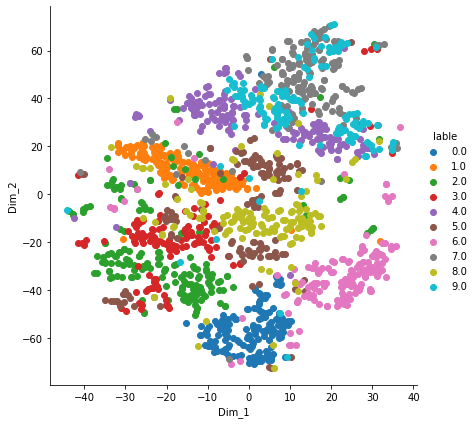

In [19]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sn
standardized_data = StandardScaler().fit_transform(data)
data_1000 = standardized_data[0:1500,:]
model = TSNE(n_components = 2)
tane_data = model = model.fit_transform(data_1000)
# creating a data fram which help us in ploting the result
tane_data = np.vstack((tane_data.T,label_1500)).T
tane_df = pd.DataFrame(data=tane_data, columns=('Dim_1','Dim_2','lable'))
# ploting the result of tsne
sn.FacetGrid(tane_df,hue='lable',height = 6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

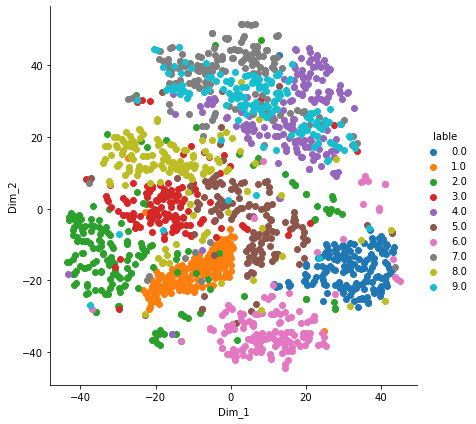

In [21]:
model = TSNE(n_components = 2 , random_state = 0 ,perplexity = 50 , n_iter = 5000)
tane_data = model = model.fit_transform(data_1000)
# creating a data fram which help us in ploting the result
tane_data = np.vstack((tane_data.T,label_1500)).T
tane_df = pd.DataFrame(data=tane_data, columns=('Dim_1','Dim_2','lable'))
# ploting the result of tsne
sn.FacetGrid(tane_df,hue='lable',height = 6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

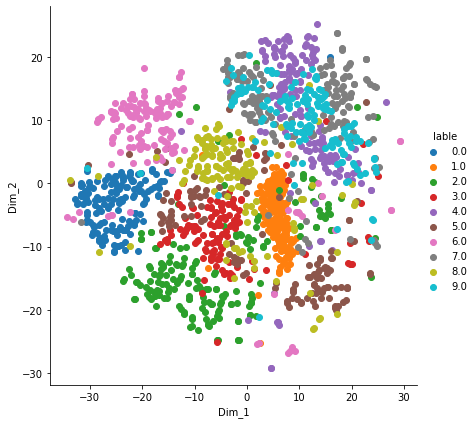

In [22]:
model = TSNE(n_components = 2 , random_state = 0 ,perplexity = 100 , n_iter = 5000)
tane_data = model = model.fit_transform(data_1000)
# creating a data fram which help us in ploting the result
tane_data = np.vstack((tane_data.T,label_1500)).T
tane_df = pd.DataFrame(data=tane_data, columns=('Dim_1','Dim_2','lable'))
# ploting the result of tsne
sn.FacetGrid(tane_df,hue='lable',height = 6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

This code is t-distributed stochastic neighbor embedding (t-SNE) dimensionality reduction technique.
In this chapter/notebook we usig mnist data for both technique and visualizing the graph.We using a 1500 sample data plot the graph.

dataset:-https://www.kaggle.com/shivambaldha/mnist-dataset

Dimensionality Reduction & Visualization Technique blog 

https://distill.pub/2016/misread-tsne/